In [1]:
import torch

In [2]:
print(torch.__version__)

1.4.0


In [3]:
torch.cuda.is_available()

False

# Part 1

nd-tensor:
 - n = number of indicies requierd to access a specific element
 
dimension (d) of a tensor DIFFERS from the dimension of a vector in a vector space
 - dimension of a tensor does not tell us how many components are in the tensor

In [4]:
# 2 dimensional tensor with 9 components
dd = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

dd_bad = [
    [1,2,3],
    [4,5,6,7], # this doesn't work bc different length! this crazy thing isn't even a matrix or tensor, or is it? def not a matix but i guess can represent it with a tensor? so matrixes can only have yeah, 2 freedoms of dimension. so what is this things dimension? how many does it have?
    [7,8,9]
]

# Rank, Axis and Shape

Rank: number of dims within the tensor

- ex. rank 2 tensor = matrix = 2d array = 2d tensor
    
- tells us how many indicies are required to refer to specific element
    
Axis: a specific dim of a tensor

- rank 2 tensor has 2 axis
- elements "run" along an axis
- axis has a length: how many indicies are available along the axis 

In [5]:
# example, tensor with first axis of length = 3, second axis length = 4

t = [
    [1,2,3,4],
    [4,5,6,5],
    [7,8,9,10]
]

# axis 1
t[0]
t[1]
t[2]

# axis 2
t[0][0]
t[0][1]
t[0][2]
t[0][3]

t[1][0]
t[1][0]
#etc

4

### Shape

- determined by the length of each axis

- shape is same as torch.Size



In [6]:
t = torch.tensor(t)
t.shape

torch.Size([3, 4])

**Rank** of a variable is equal to length of its shape

In [7]:
len(t.shape)

2

Shape is important because it allows us to conceptualize a tensor
- encodes all relevant informatino about axis & rank, and therefor indicies
- a common operation is **reshaping**

# Reshaping (introduction)

- changes the grouping of the terms, but does not change the underlying data

- products of the shape must be equal!
    - (3 * 3 ) = (1 * 9)

In [10]:
t2 = torch.tensor(dd)
t2

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [11]:
t2.reshape(1,9)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [12]:
t2.reshape(1,9).shape

torch.Size([1, 9])

# Part 2

## 7 CNN Tensor Shape Explained

- Putting conecepts of rank, axis and shape to use with example
- Consider image input to a CNN
 - shape of CNN input typically has length of 4 (rank 4 tensor with 4 axis)

In [13]:
Height = 28
Width = 28
Color = 1 # or 3 for RGB
BatchSize = 3

example_input = [BatchSize, Color, Height, Width]

When an image input passes through a convolutional layer, the **shape** and underlying data are changed by the convolution operation.

It changes the height and width, as well as the color channel
- ex the color channels change to "feature channels"

## 8 PyTorch Tensors Explained

In [14]:
import numpy as np

Pytorch specific attributes

In [18]:
t = torch.Tensor()
print(t.dtype)
print(t.device)
print(t.layout)

torch.float32
cpu
torch.strided


### Data Types
- CPU and GPU have their own data types
- ex. 32-bit floating point (torch.float32) on cpu is torch.FloatTensor but on GPU is torch.cuda.FloatTensor
- tensor operations between tensors must operate with tensors of same data type
- tensor operations between tensors must operate with tensors on same device

### Creating tensors from data

In [19]:
data = np.array([1,2,3])
type(data)

numpy.ndarray

In [23]:
torch.Tensor(data) # Class constructor, uses global default dtype value (torch.get_default_dtype)

tensor([1., 2., 3.])

In [31]:
torch.tensor(data) # factory function, infers the dtype (type inference)

tensor([1, 2, 3])

In [25]:
torch.as_tensor(data) # another factory function

tensor([1, 2, 3])

In [26]:
torch.from_numpy(data) # another factory function

tensor([1, 2, 3])

### creating tensor without data

In [27]:
torch.eye(2) # identity matrix

tensor([[1., 0.],
        [0., 1.]])

In [28]:
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [29]:
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [30]:
torch.rand(2,2)

tensor([[0.0775, 0.3810],
        [0.8816, 0.2963]])

## 9 Creating PyTorch Tensors for Deep Learning Best options

factory functions

- a function that accepts parameter inuputs and returns a particular type of object
- purpose is to allow for more dynamic object creation?
- def google this and see more into it....


- factory functions (for pytorch) have better documentation and more configuration parameters so lets use those

In [32]:
t1 = torch.Tensor(data)
t2 = torch.tensor(data)
t3 = torch.as_tensor(data)
t4 = torch.from_numpy(data)

### Differences in methods, sharing vs copying memory

In [33]:
# modify the data
data[0] = 0
data[1] = 0
data[2] = 0

In [34]:
print(t1)
print(t2)
print(t3)
print(t4)

tensor([1., 2., 3.])
tensor([1, 2, 3])
tensor([0, 0, 0])
tensor([0, 0, 0])


sharing the data is more effecient

"best" function is torch.tensor(), its the go-to

tuning code for performance, as_tensor

so as_tensor vs from_numpy?
- as_tensor can accept any data type, not just numpy. Otherwise they are mostly the same

## 10 Flatten, Reshape, and Squeeze Explained

### Tensor operations
1. reshaping
2. element-wise operations
3. reduction operations
4. access operations


In [35]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)

In [36]:
t.numel()

12

In [37]:
t.reshape(2,2,3)

tensor([[[1., 1., 1.],
         [1., 2., 2.]],

        [[2., 2., 3.],
         [3., 3., 3.]]])

### Squeezing and unsqueezing

squeezing: remove all of the axis that have a length of 1

unsqueezing: adds a dimension with a length of 1

In [43]:
print(t.reshape(1,12))
print(t.reshape(1,12).shape)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


In [44]:
print(t.reshape(1,12).squeeze())
print(t.reshape(1,12).squeeze().shape)

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
torch.Size([12])


In [46]:
print(t.reshape(1,12).squeeze().unsqueeze(dim=0))
print(t.reshape(1,12).squeeze().unsqueeze(dim=0).shape)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


### flattening
- a specific type of reshaping
- removes all the axes except for 1 (turns into a big vector, rank 1 tensor)
- common use case is when transitioning from a convolutional layer to a fully connected layer
 - take output in form of output channels, and flatten into a 1d-array

In [47]:
def flatten(t):
    t = t.reshape(1,-1) # the -1 means figure out what it should be. For ours, it will figure out it should be 12
    t = t.squeeze()
    return t

# or 
def flatten2(t):
    t = t.reshape() # dim= 0?

## 11 CNN Flatten Operation Visualized 

In [48]:
# example images output from different channels from cnn

t1 = torch.tensor([
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1]
])

t2 = torch.tensor([
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2]
])

t3 = torch.tensor([
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3]
])

In [50]:
# combine them
t = torch.stack((t1, t2, t3))
t.shape

torch.Size([3, 4, 4])

In [51]:
t

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]],

        [[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]])

In [53]:
# adding a color channel
t = t.reshape(3,1,4,4)
t

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

In [54]:
# then flatten
t.flatten()

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [55]:
# however this doesn't work because 
# because we need individual predictions
# for each image within our batch tensor, and now we have a flattened mess
t.flatten(start_dim=1).shape

torch.Size([3, 16])

In [56]:
# the 1 is an index, so it is the color axis, it skipps the batch axis
t.flatten(start_dim=1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

## 12 Tensors for Deep Learning - Broadcasting and Element-wise Operations 

Element-wise Operations: operations that operates on elements with same index between tensors

In [57]:
t1 = torch.tensor([
    [1,2],
    [3,4]
], dtype=torch.float32)

t2 = torch.tensor([
    [9,8],
    [7,6]
], dtype=torch.float32)

2 tensors must have the same **shape** to do an element-wise operation

In [58]:
# Adittion
t1 + t2

tensor([[10., 10.],
        [10., 10.]])

### tensor broadcasting
- the scalar turns into an appropriate tensor to match shape, then element wise
- important in data preprocessing and normalization
 - don't write loops!

In [59]:
t1 + 2 # or t1.add(2)

tensor([[3., 4.],
        [5., 6.]])

In [60]:
# trickier broadcasting

t1 = torch.tensor([
    [1,1],
    [1,1]
], dtype=torch.float32)

t2 = torch.tensor([2,4], dtype=torch.float32)

In [61]:
t1 + t2

tensor([[3., 5.],
        [3., 5.]])

## 13 Code for Deep Learning - ArgMax and Reduction Tensor Ops

reduction operation
- reduces number of elements contained within tensor
- operates on elements within a single tensor
- sum,mean,std, etc


In [77]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)

In [78]:
t.numel()

12

In [79]:
print(t.sum())
print(t.sum().numel())

tensor(24.)
1


In [81]:
# with respect to a specific axis
t.sum(dim=0)

tensor([6., 6., 6., 6.])

In [82]:
t.sum(dim=1)

tensor([ 4.,  8., 12.])

### argmax
- which argument when supplied as input, gives functions max output
- use it on the NN's output prediction tensor. allows us to determine which category has highest prediction value (duh)

In [83]:
t = torch.tensor([
    [1,0,0,2],
    [0,3,3,0],
    [4,0,0,5]
], dtype=torch.float32)

In [84]:
t.max()

tensor(5.)

In [85]:
t.argmax()

tensor(11)

In [86]:
t.max(dim=0)

torch.return_types.max(
values=tensor([4., 3., 3., 5.]),
indices=tensor([2, 1, 1, 2]))

In [87]:
t.argmax(dim=0)

tensor([2, 1, 1, 2])

In [88]:
t.max(dim=1)

torch.return_types.max(
values=tensor([2., 3., 5.]),
indices=tensor([3, 2, 3]))

In [89]:
t.argmax(dim=1)

tensor([3, 2, 3])

# Part 3

## 14 Data in Deep Learning

- fashion MNIST similar to same (10 classes)
- same image size
- same split of 60,000 train and 10,000 test
    - NNs that have been trained on original MNIST can be transfered to this one without changing the output layers
- 


## 15 CNN Image Preparation Code Project - Learn to Extract, Transform, Load (ETL)

- using torchvision

In [90]:
import torchvision
import torchvision.transforms as transforms

2 pytorch classes for this
Dataset
- an abstract class for representing a dataset

DataLoader
- wrapps a datsetset and provides access to underlying data

An **Abstract class** is a class that has methods we **must** implement ourselves

So to create a custom dataset using pytorch, we just extend the Dataset class by creating a subclass the implrments the required methods.

Upon doing this, the new class can then be passed to a DataLoader object constructor, thereby wrapping the dataset and giving adittinoal functionality.

We will be using fashion-MNIST so don't need to do that

## Torchvision

- gives us access to Datasets (MNIST), Models (VGGA16), Trandorms, Utils

In [91]:
# get a dataset, then wrap it with a DataLoader

# get fashion-MNIST
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


In [93]:
# wrapping the train set into the DataLoader object instance, now can use Loader for tasks,
# like batch size, thread management and shuffeling

train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=10
#     ,shuffle=True
)

## 16 PyTorch Datasets and DataLoaders - Training Set Exploration

working with the dataset and dataloader objects

In [94]:
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [96]:
len(train_set)

60000

In [97]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

- uniformly distributed wrt number of samples for each category
- in general, should mirror what they should be in real world or equal number
- replicate less common one until there are equal number (paper about how ***its always the best thing to do)***


In [99]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [100]:
# accessing a data sample
sample = next(iter(train_set))

In [101]:
len(sample)

2

In [102]:
type(sample)

tuple

In [103]:
image, label = sample

In [106]:
type(label)

int

In [107]:
image.shape

torch.Size([1, 28, 28])

In [108]:
torch.tensor(label).shape

torch.Size([])

label: 9


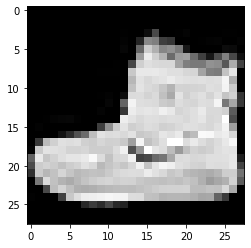

In [110]:
plt.imshow(image.squeeze(), cmap="gray")
print( 'label:' , label)

In [111]:
batch = next(iter(train_loader))

In [112]:
type(batch)

list

In [113]:
images, labels = batch

In [114]:
images.shape

torch.Size([10, 1, 28, 28])

In [115]:
labels.shape

torch.Size([10])

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


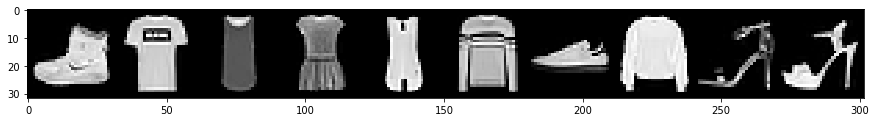

In [117]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))
print('labels:', labels)

## 17 - Build PyTorch CNN - Object Oriented Neural Networks

- we are now ready to **build the model**

### object oriented programming 
- every pytorch model is OOP
- a layer is an object
- an entire nn is also an object
    - but layers are just functions, and nn are just composition of layers so composition of a function is just a function
- nn.Module is the base class. Your models should also subclass this class
- must provide an implementation if the forward method
    - usually use nn.functional package to do this

In [119]:
import torch.nn as nn

## 18 - CNN Layers 

- hyperparameters
    - kernel_size: sets size of filter
    - out_channels: number of filters
    - out_features: size of output tensor
    
- data dependent hyperameters:
    - in_channels
    - out_features

In [120]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # implement the forward pass
        return t

## 19 - CNN Weights

- learnable parameters: different from hyperparameter in that the value is learned during training process. Then get updated when network "learns" those values for the parameters. Values that minimize the loss function
    - weights that live inside each layer
    - bias are also learnable parameter

In [122]:
network = Network()

# using the print method from module
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


stride and bias we did not set, so it was just set to default

In [123]:
# lookint at weights
network.conv1.weight

Parameter containing:
tensor([[[[-0.1224,  0.0843, -0.1443,  0.1261, -0.1108],
          [-0.1631, -0.1556, -0.0752,  0.0667, -0.1488],
          [ 0.0591, -0.0951, -0.0452, -0.1542,  0.1839],
          [ 0.0633,  0.1150,  0.1933, -0.0303,  0.0538],
          [ 0.0831, -0.1979,  0.1889, -0.1542,  0.0771]]],


        [[[-0.0792,  0.0255, -0.1292, -0.0770, -0.1758],
          [-0.1069,  0.0555, -0.0490,  0.1635,  0.0453],
          [-0.1097, -0.0551, -0.0295,  0.0210,  0.0351],
          [-0.0315,  0.0182, -0.0163,  0.0439, -0.1831],
          [-0.0748, -0.0650, -0.0057,  0.0115, -0.0422]]],


        [[[-0.1487,  0.1980,  0.0723, -0.0853,  0.1570],
          [ 0.0238, -0.1202,  0.1718,  0.1184, -0.1700],
          [-0.1698,  0.1335,  0.1330, -0.0457,  0.0128],
          [-0.1484, -0.1591,  0.1481,  0.1568,  0.0005],
          [ 0.0394, -0.0581,  0.1898,  0.0773, -0.0074]]],


        [[[ 0.0138, -0.0685,  0.1984,  0.1841,  0.0955],
          [-0.1600, -0.1316, -0.0064, -0.0305, -0.1797

The parameter class extends the tensor class and its when the weights are learned and automatically updated. notice it says "Parameter containing:"

In [124]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [125]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

- note the filters are all represented as 1 tensor, the 6 filters. Then 1 "input channel" or depth, and then 5x5 height and width of the filters

In [128]:
network.fc1.weight.shape

torch.Size([120, 192])

normal weight matrix, commonly known 

In [129]:
network.fc2.weight.shape

torch.Size([60, 120])

## 20 - Callable Neural Networks - Linear Layers in Depth


- weight matrix defines a function that maps input tensor to output tensor
- weight matrix lives inside the linear layer class


In [130]:
in_features = torch.tensor([1,2,3,4], dtype=torch.float32)

# out example weight matrix
weight_matrix = torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
], dtype=torch.float32)

In [131]:
fc = nn.Linear(in_features=4, out_features=3)

In [132]:
fc(in_features)

tensor([0.7590, 0.7040, 0.7327], grad_fn=<AddBackward0>)

- Pytorch initializes weight matrix with ransom values
- we can explicitly set the weight matrix

In [133]:
fc.weight = nn.Parameter(weight_matrix)

In [134]:
fc(in_features)

tensor([30.3958, 40.1741, 50.1619], grad_fn=<AddBackward0>)

In [139]:
# we can get exact match if we set bias = False
fc = nn.Linear(in_features=4, out_features=3, bias = False)
fc.weight = nn.Parameter(weight_matrix)

In [140]:
fc(in_features)

tensor([30., 40., 50.], grad_fn=<SqueezeBackward3>)

### \__call\__ method
- notice how we could just call fc() like it was a function
- because it implements \__call\__
    - call method in turn invokes the forward() method for us
        - which in turn invoves the linear() function which does the linear alg matrix mul
- so any time we want to use the forward method, we just call the object instead (layers and networks, cause they are both nn.Module objects)


## 21 - CNN Forward Method implementation
 - some operations doesn't use the weights, so we call it from Functional package
 - whole network is just a composition of functions
 
 - need to reshape after conv layer and going to linear layer


In [141]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    
    def forward(self, t):
        # (1) input layer
        t = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)  # doesn't use the weights so call from Functional package
        t = F.max_pool2d(t, kernel_size=2, stride=2) # doesn't use the weights so call from Functional package

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        # 12 is from number of output channels from previous conf layer.
        # 4x4 is the height and width of each output channel
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        
        # softmax returns positive probability for all possible outputs, all sum to 1
        # usually use in final output layer
        # we won't use it tho b/c its a loss function we will already be using in the trainig process
        # it bacially will already be implemented in training 
        # cross-entropy loss func implicitly does softmax??
        
        #t = F.softmax(t, dim=1) 
        
        return t

## 22 - CNN Image Prediction Forward Propagation Explained


* so entire reason why it needs tensors is because we use batches!!!?? so it can do it all at once? cause like everything else just seems like it would be matrix (2d) multipliying right. Ok so also easier to represent data, like how image has color channels, plus height and width. Like you COULD just put the hwole thing in a matrix or even a vector, but less clear. thats what ends up happening anyways with flatten() operation

- lets understand how our network is working


- turning off gradient calculation
 - prevents it from crating a computation graph

- computation graph
    - keeps track of network mapping and used to calculate gradients and used to update weights
    
- turning it off reduces memory consumption




In [143]:
torch.set_grad_enabled(False)

In [148]:
import torch.nn.functional as F

In [144]:
network = Network()

In [145]:
sample = next(iter(train_set)) 
image, label = sample 
image.shape 

torch.Size([1, 28, 28])

In [146]:
# we are just testing 1 image, but we need a batch, so we just pack an image into a batch of 1

# the 4 methods in the pytorch NN module conv layers classes expect layers to have 4 dims

# unsqueeze to add an adittional dim
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [149]:
# image shape needs to be (batch_size × in_channels × H × W)
pred = network(image.unsqueeze(0))

In [150]:
pred

tensor([[-0.0774, -0.0009,  0.1230,  0.0237, -0.0658,  0.0440,  0.0327,  0.0347,  0.0762, -0.0456]])

In [151]:
# 1 image in the batch, and 10 possible final outputs
pred.shape

torch.Size([1, 10])

In [154]:
# if we want those outputs to be probabilities, we just use softmax()
# noticed that most are around 10% cause yeah its untrained
F.softmax(pred, dim=1)

tensor([[0.0911, 0.0983, 0.1113, 0.1007, 0.0921, 0.1028, 0.1017, 0.1019, 0.1062, 0.0940]])

In [155]:
F.softmax(pred, dim=1).sum()

tensor(1.0000)

In [156]:
pred.argmax(dim=1)

tensor([2])

## 23 - Neural Network Batch Processing

### now, can just do the same thing with a batch

In [157]:
preds = network(images)

In [164]:
preds

tensor([[-0.0774, -0.0009,  0.1230,  0.0237, -0.0658,  0.0440,  0.0327,  0.0347,  0.0762, -0.0456],
        [-0.0766, -0.0031,  0.1179,  0.0141, -0.0685,  0.0436,  0.0415,  0.0325,  0.0856, -0.0508],
        [-0.0647,  0.0029,  0.1155,  0.0347, -0.0575,  0.0446,  0.0597,  0.0380,  0.0857, -0.0703],
        [-0.0657,  0.0016,  0.1193,  0.0283, -0.0629,  0.0411,  0.0568,  0.0313,  0.0919, -0.0672],
        [-0.0729,  0.0036,  0.1222,  0.0253, -0.0745,  0.0320,  0.0448,  0.0291,  0.0982, -0.0619],
        [-0.0748, -0.0009,  0.1309,  0.0235, -0.0633,  0.0412,  0.0332,  0.0288,  0.0816, -0.0555],
        [-0.0664,  0.0013,  0.1303,  0.0333, -0.0577,  0.0464,  0.0439,  0.0285,  0.0755, -0.0528],
        [-0.0813, -0.0082,  0.1290,  0.0202, -0.0637,  0.0373,  0.0222,  0.0232,  0.0810, -0.0463],
        [-0.0653,  0.0021,  0.1236,  0.0373, -0.0553,  0.0582,  0.0590,  0.0410,  0.0914, -0.0754],
        [-0.0699,  0.0010,  0.1305,  0.0322, -0.0599,  0.0514,  0.0427,  0.0379,  0.0835, -0.0579]])

In [158]:
preds.argmax(dim=1)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [159]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [160]:
preds.argmax(dim=1).eq(labels)

tensor([False, False, False, False, False,  True, False,  True, False, False])

In [161]:
preds.argmax(dim=1).eq(labels).sum()

tensor(2)

In [162]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [163]:
get_num_correct(preds, labels)

2

## 24 - CNN Output Size Formula

looking at how the tensor is tranformed as it moved throughout the network

whoah cool debugging thing in vs code!

## 25 - CNN Training with Code Example

- can do more than 1 epoch (a complete pass of all training examples)

### Calculating loss for a single batch

In [ ]:
batch = next(iter(train_loader)) # Get Batch
images, labels = batch

preds = network(images) # Pass Batch
loss = F.cross_entropy(preds, labels) # Calculate Loss, the cross_entropy is one of many loss functions

loss.backward() # Calculate Gradients
# after this step, now a gradient tensor has been created, with the same
# shape as the weight tensor! (a gradient for each weight)


optimizer.step() # Update Weights
# step in direction of loss function minimum


#-----------------------------------------------------


print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

## 27 - Stack vs Concat in PyTorch

examples:
- suppose we have 3 images as tensors (channel, height, width). We want to join these together to form a batch of 3 images. Do we concat or stack?
    - stack b/c we need new dimension for batch
- same 3 images, but now they have a dimension for the batch
    - now we can just concat using that existing dimension
- same image tensors from first (no batch dim), but we want to join them with existing batch
    - we need to first stack the 3 images, then concat with existing batch tensor

In [165]:
t1 = torch.tensor([1,1,1])
t2 = torch.tensor([2,2,2])
t3 = torch.tensor([3,3,3])

In [166]:
torch.cat(
    (t1,t2,t3)
    ,dim=0
)

tensor([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [167]:
torch.stack(
    (t1,t2,t3)
    ,dim=0
)

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])